In [60]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix

In [61]:
df = pd.read_csv("/kaggle/input/heart-prediction-dataset-quantum/Heart Prediction Quantum Dataset.csv")
df.head()

Age  Gender  BloodPressure  Cholesterol  HeartRate  QuantumPatternFeature  \
0   68       1            105          191        107               8.362241   
1   58       0             97          249         89               9.249002   
2   44       0             93          190         82               7.942542   
3   72       1             93          183        101               6.495155   
4   37       0            145          166        103               7.653900   

   HeartDisease  
0             1  
1             0  
2             1  
3             1  
4             1

In [62]:
df.isnull().sum()

Age                      0
Gender                   0
BloodPressure            0
Cholesterol              0
HeartRate                0
QuantumPatternFeature    0
HeartDisease             0
dtype: int64

In [63]:
df["HeartDisease"].value_counts()

HeartDisease
1    300
0    200
Name: count, dtype: int64

In [64]:
df.columns

Index(['Age', 'Gender', 'BloodPressure', 'Cholesterol', 'HeartRate',
       'QuantumPatternFeature', 'HeartDisease'],
      dtype='object')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

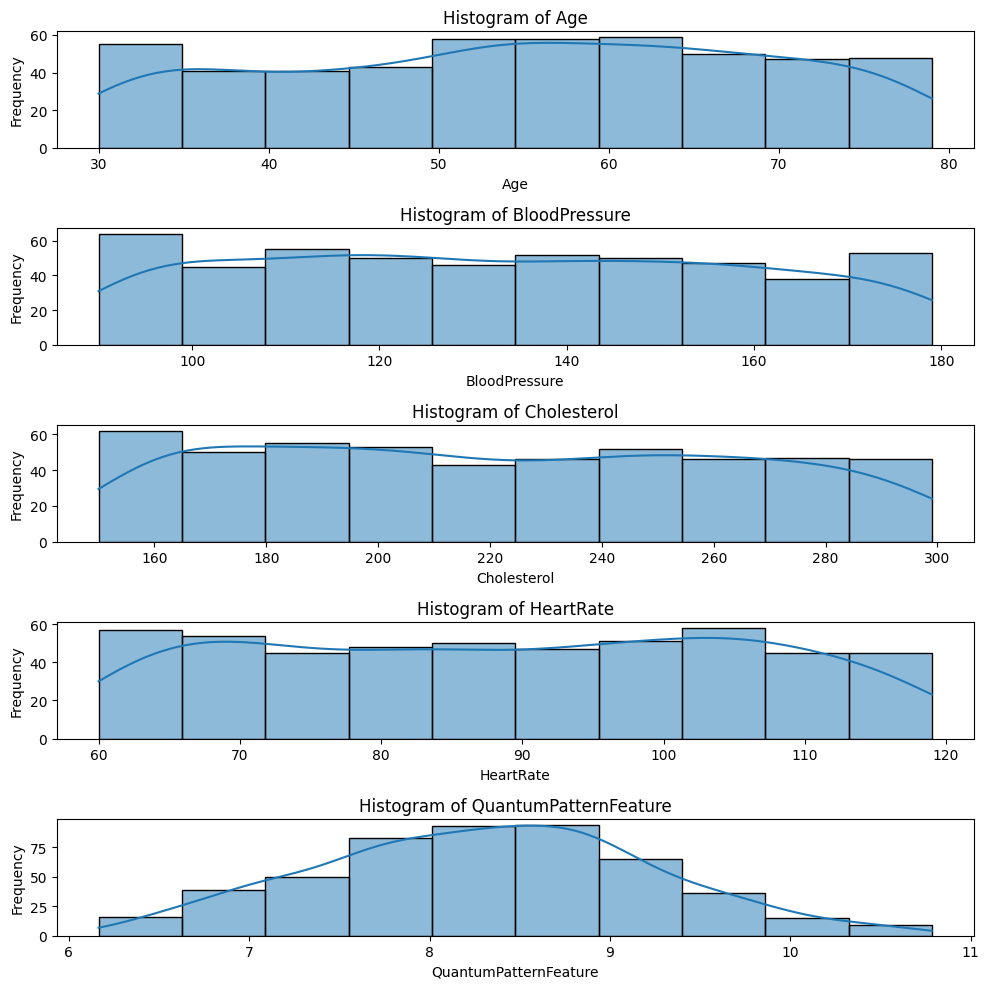

In [65]:
# Define continuous variables
continuous = ['Age', 'BloodPressure', 'Cholesterol', 'HeartRate',
       'QuantumPatternFeature']
# Create subplots
fig, axes = plt.subplots(5, 1, figsize=(10, 10))
axes = axes.flatten()
# Plot histograms
for i, var in enumerate(continuous):
    sns.histplot(df[var], bins=10, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

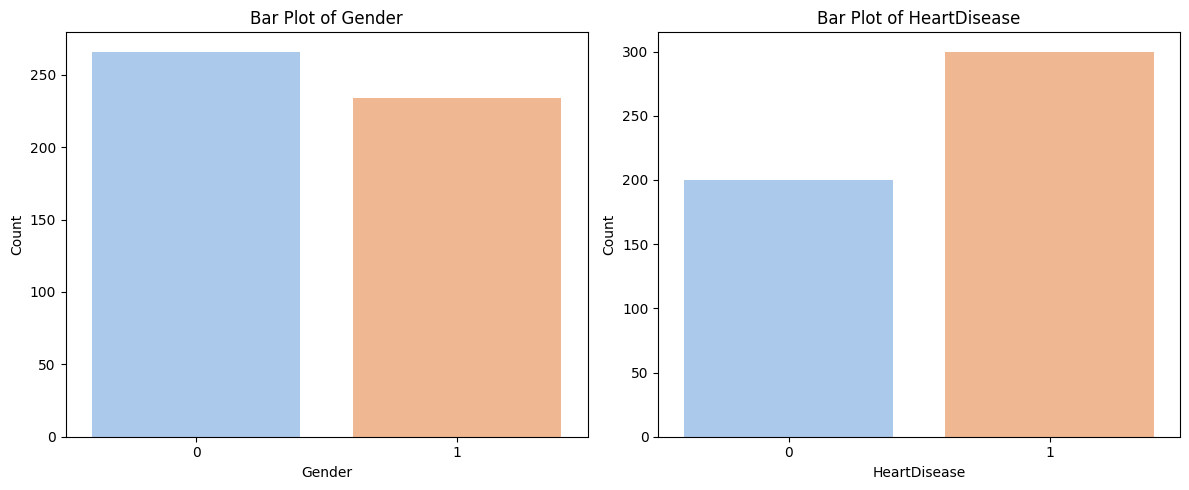

In [66]:
categorical = ['Gender','HeartDisease']
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Plot bar plots
for i, var in enumerate(categorical):
    sns.countplot(x=df[var], ax=axes[i], palette="pastel")
    axes[i].set_title(f'Bar Plot of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [67]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [68]:
# Define XGBoost model
xgb_clf = xgb.XGBClassifier(eval_metric="logloss", random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 8],
    'learning_rate': [0.001, 0.01, 0.1]
}
# Perform Grid Search with 10-fold CV
grid_search = GridSearchCV(xgb_clf, param_grid, scoring='accuracy', cv=10, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END .learning_rate=0.001, max_depth=3, n_

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [3, 5, 8],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy', verbose=2)

In [69]:
# Get best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


In [70]:
# Evaluate on test set using XGBOOST
best_xgb = grid_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.87


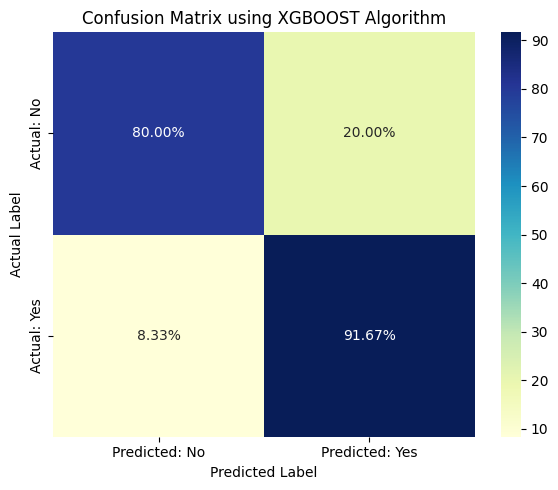

In [71]:
# Compute confusion matrix for XGBOOST
cm = confusion_matrix(y_test, y_pred_xgb)
# Row-wise percentage (normalize by actual class)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
# Format each cell as a string with '%' symbol
labels = np.array([["{0:.2f}%".format(value) for value in row] for row in cm_percent])
# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_percent, annot=labels, fmt='', cmap="YlGnBu", cbar=True,
            xticklabels=["Predicted: No", "Predicted: Yes"],
            yticklabels=["Actual: No", "Actual: Yes"])
plt.title("Confusion Matrix using XGBOOST Algorithm")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()

In [72]:
print("XGBOOST Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBOOST Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83        40
           1       0.87      0.92      0.89        60

    accuracy                           0.87       100
   macro avg       0.87      0.86      0.86       100
weighted avg       0.87      0.87      0.87       100



In [73]:
# Define Random Forest model
rf_clf = RandomForestClassifier(random_state=42)
# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 150, 200, 250],  # Number of trees
    'max_depth': [3, 5, 8, 10, 15],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
}
# Perform Grid Search with 10-fold CV
grid_search = GridSearchCV(rf_clf, param_grid, scoring='accuracy', cv=10, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=400; total time=   0.2s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=400; total time=   0.2s
[CV] END .learning_rate=0.001, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END .learning_rate=0.001, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END .learning_rate=0.001, max_depth=5, n_

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 8, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 150, 200, 250]},
             scoring='accuracy', verbose=2)

In [74]:
# Get best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 8, 'min_samples_split': 10, 'n_estimators': 100}


In [75]:
# Evaluate on test set using RF
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.91


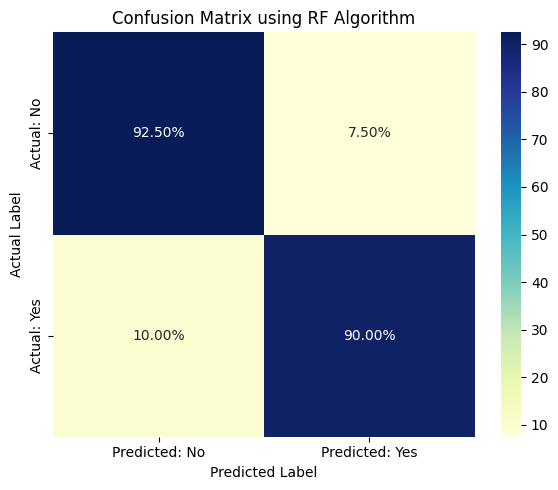

In [76]:
# Compute confusion matrix for RF
cm = confusion_matrix(y_test, y_pred_rf)
# Row-wise percentage (normalize by actual class)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
# Format each cell as a string with '%' symbol
labels = np.array([["{0:.2f}%".format(value) for value in row] for row in cm_percent])
# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_percent, annot=labels, fmt='', cmap="YlGnBu", cbar=True,
            xticklabels=["Predicted: No", "Predicted: Yes"],
            yticklabels=["Actual: No", "Actual: Yes"])
plt.title("Confusion Matrix using RF Algorithm")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()

In [77]:
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89        40
           1       0.95      0.90      0.92        60

    accuracy                           0.91       100
   macro avg       0.90      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100



**Logistic Regression Model**

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [79]:
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit and transform the training data, and transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [80]:
# Define Logistic Regression model
log_reg_clf = LogisticRegression(random_state=42, max_iter=1000)
# Define hyperparameter grid
param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1],  # Regularization strength
    'solver': ['lbfgs', 'liblinear'],  # Optimization algorithms
    'penalty': ['l2'],  # Regularization type (L2 is commonly used)
    'multi_class': ['ovr', 'multinomial']  # Multi-class strategies
}

# Perform Grid Search with 10-fold CV
grid_search = GridSearchCV(log_reg_clf, param_grid, scoring='accuracy', cv=10, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits

[CV] END max_depth=10, min_samples_split=2, n_estimators=250; total time=   0.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=250; total time=   0.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=250; total time=   0.7s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_split=5, n_estimators=150; total time=   0.4s
[CV] END max_depth=10, min_samples_split=5, n_estimators=150; total time=   0.4s
[CV] END max_depth=10, min_samples_split=5, n_estimators=150; total time=   0.4s
[CV] END max_depth=10, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, min_samples_split=5, n_estimators=250; total time=   0.6s
[CV] END max_depth=10, min_samples_split=5, n_estimators=250; total time=   0.6s
[CV] END max_depth=10, min_samples_split=5, n

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1207, in fit
    multi_class = _check_multi_class(self.multi_class, solver, len(self.classes_))
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1],
                         'multi_class': ['ovr', 'multinomial'],
                         'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear']},
             scoring='accuracy', verbose=2)

In [81]:
# Get best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 0.1, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}


In [82]:
# Evaluate on test set
best_lr = grid_search.best_estimator_
y_pred_lr = best_lr.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_lr)
print("Test Accuracy fo Logistic Regression Model:", accuracy)

Test Accuracy fo Logistic Regression Model: 0.92


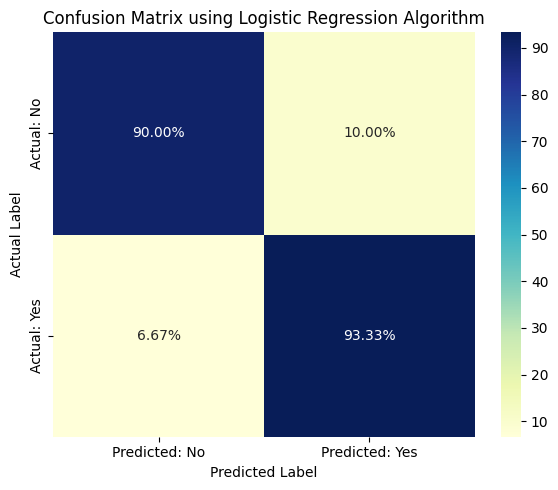

In [83]:
# Compute confusion matrix for Logistic Regression
cm = confusion_matrix(y_test, y_pred_lr)
# Row-wise percentage (normalize by actual class)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
# Format each cell as a string with '%' symbol
labels = np.array([["{0:.2f}%".format(value) for value in row] for row in cm_percent])
# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_percent, annot=labels, fmt='', cmap="YlGnBu", cbar=True,
            xticklabels=["Predicted: No", "Predicted: Yes"],
            yticklabels=["Actual: No", "Actual: Yes"])
plt.title("Confusion Matrix using Logistic Regression Algorithm")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()

In [84]:
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        40
           1       0.93      0.93      0.93        60

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



In [86]:
# Define LightGBM model
lgb_clf = lgb.LGBMClassifier(random_state=42)
# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 5, 8, -1],  # Maximum tree depth (-1 means no limit)
    'learning_rate': [0.001, 0.01, 0.1]  # Learning rate
}
# Perform Grid Search with 10-fold CV
grid_search = GridSearchCV(lgb_clf, param_grid, scoring='accuracy', cv=10, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] END max_depth=15, min_samples_split=2, n_estimators=150; total time=   0.4s
[CV] END max_depth=15, min_samples_split=2, n_estimators=150; total time=   0.4s
[CV] END max_depth=15, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=15, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=15, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=15, min_samples_split=2, n_estimators=250; total time=   0.6s
[CV] END max_depth=15, min_samples_split=2, n_estimators=250; total time=   0.6s
[CV] END max_depth=15, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, min_samples_split=5, n_estimators=150; total time=   0.4s
[CV] END max_depth=15, min_samples_split=5, n_

GridSearchCV(cv=10, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [3, 5, 8, -1],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [87]:
# Get best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}


In [88]:
# Evaluate on test set for LightGBM
best_lgb = grid_search.best_estimator_
y_pred_lgb = best_lgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lgb)
print("Test Accuracy for LightGBM:", accuracy)

Test Accuracy for LightGBM: 0.91


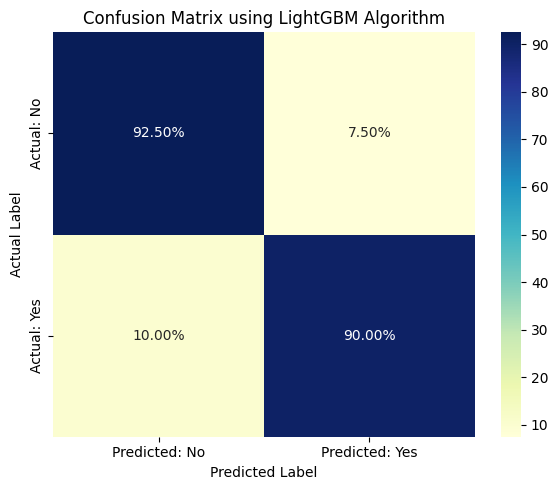

In [89]:
# Compute confusion matrix for XGBOOST
cm = confusion_matrix(y_test, y_pred_lgb)
# Row-wise percentage (normalize by actual class)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
# Format each cell as a string with '%' symbol
labels = np.array([["{0:.2f}%".format(value) for value in row] for row in cm_percent])
# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_percent, annot=labels, fmt='', cmap="YlGnBu", cbar=True,
            xticklabels=["Predicted: No", "Predicted: Yes"],
            yticklabels=["Actual: No", "Actual: Yes"])
plt.title("Confusion Matrix using LightGBM Algorithm")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()

In [90]:
print("LightGBM Classification Report:\n", classification_report(y_test, y_pred_lgb))

LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89        40
           1       0.95      0.90      0.92        60

    accuracy                           0.91       100
   macro avg       0.90      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100



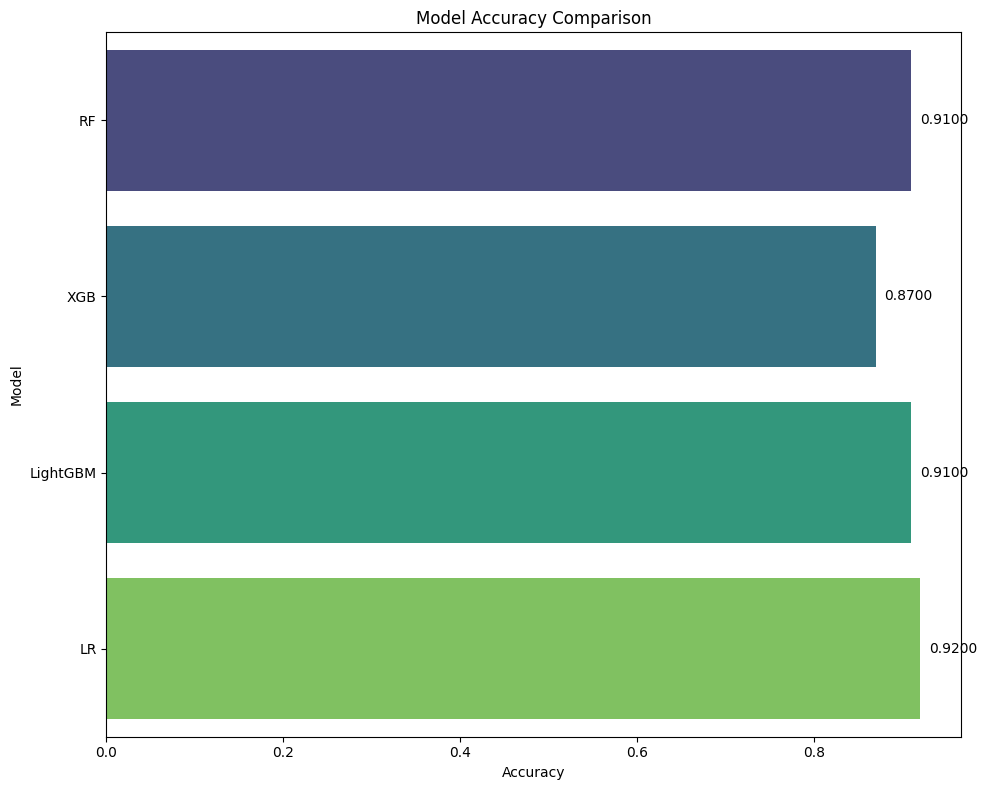

In [92]:
# Create a dictionary with model names and corresponding accuracy values
accuracy_dict = {
    'RF': accuracy_score(y_test, y_pred_rf),
    'XGB': accuracy_score(y_test, y_pred_xgb),
    'LightGBM': accuracy_score(y_test, y_pred_lgb),
    'LR': accuracy_score(y_test, y_pred_lr)
}
# Convert dictionary to DataFrame for easy plotting
accuracy_df = pd.DataFrame(list(accuracy_dict.items()), columns=['Model', 'Accuracy'])
# Create a barplot
plt.figure(figsize=(10, 8))
sns.barplot(x='Accuracy', y='Model', data=accuracy_df, palette='viridis')
# Add the accuracy values on top of the bars
for index, value in enumerate(accuracy_df['Accuracy']):
    plt.text(value + 0.01, index, f'{value:.4f}', va='center')
# Set labels and title
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Accuracy Comparison')
# Show the plot
plt.tight_layout()
plt.show()

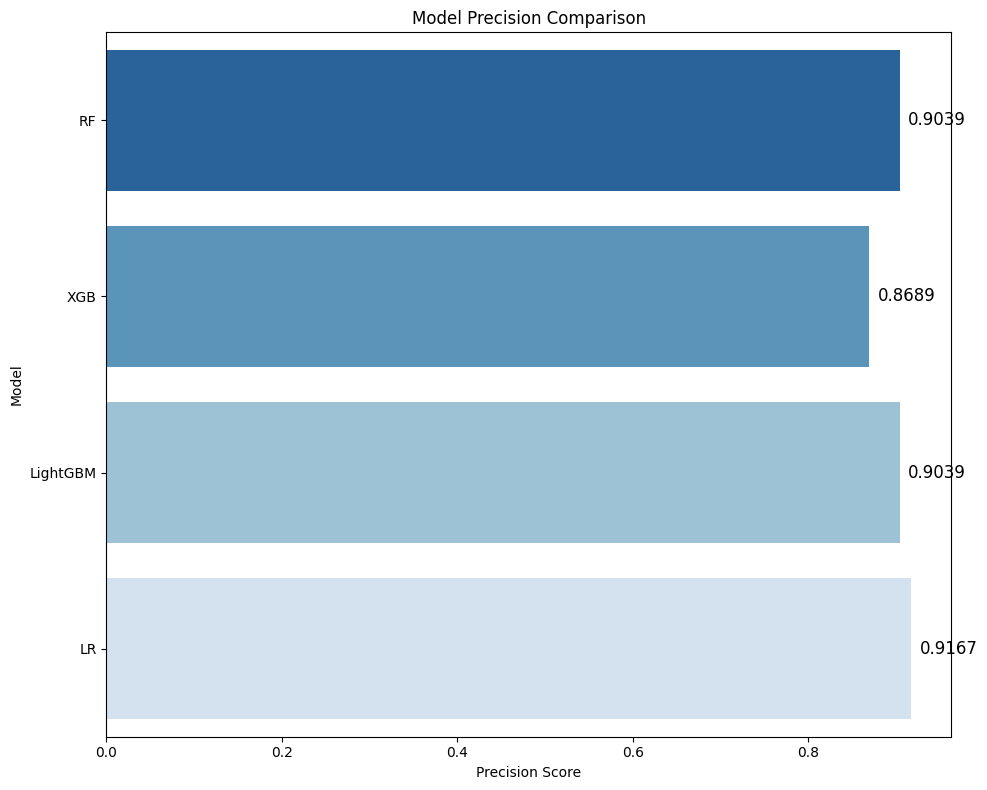

In [93]:
# Compute precision scores
prec_scores = {
    'RF': precision_score(y_test, y_pred_rf, average='macro'),
    'XGB': precision_score(y_test, y_pred_xgb, average='macro'),
    'LightGBM': precision_score(y_test, y_pred_lgb, average='macro'),
    'LR': precision_score(y_test, y_pred_lr, average='macro')
    
}
# Convert to DataFrame
precision_df = pd.DataFrame(list(prec_scores.items()), columns=['Model', 'Precision'])

# Create Precision bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Precision', y='Model', data=precision_df, palette='Blues_r')

# Add values on bars
for index, value in enumerate(precision_df['Precision']):
    plt.text(value + 0.01, index, f'{value:.4f}', va='center', fontsize=12)
# Labels and title
plt.xlabel('Precision Score')
plt.ylabel('Model')
plt.title('Model Precision Comparison')
plt.tight_layout()
plt.show()

In [94]:
from sklearn.metrics import cohen_kappa_score

In [95]:
# RF Kappa Calculation
kappa_rf = cohen_kappa_score(y_test, y_pred_rf)
# XGB Kappa Calculation
kappa_xgb = cohen_kappa_score(y_test, y_pred_xgb)
# LightGBM Kappa Calculation
kappa_lgb = cohen_kappa_score(y_test, y_pred_lgb)
# LR Kappa Calculation
kappa_lr = cohen_kappa_score(y_test, y_pred_lr)
# Display Kappa results
print(f"Kappa for RF: {kappa_rf:.4f}")
print(f"Kappa for XGBOOST: {kappa_xgb:.4f}")
print(f"Kappa for LightGBM: {kappa_lgb:.4f}")
print(f"Kappa for LR: {kappa_lr:.4f}")

Kappa for RF: 0.8148
Kappa for XGBOOST: 0.7257
Kappa for LightGBM: 0.8148
Kappa for LR: 0.8333
